In [ ]:
%load_ext autoreload
%autoreload
# lines above reload mycode so that any changes are pulled in
from covidscript import *

________________________________________________________________________________________________________________________

<center><h1>The Effectiveness of Mask Usage on<br> the Spread of Covid-19</h1>
    

<center><h3>Justin Sullivan</h3>


<h4>Abstract</h4>
Nearly two years after the first diagnosed case of COVID-19, the disease caused by infection of the SARS-CoV-2 coronavirus, the disease has affected nearly every country in the world, causing it to be classified as a true pandemic disease. As each nation has attempted to combat its spread, the means by which they have done so have, inevitably, met some resistance. Particularly, in the United States, the enforcing of mask usage has become a highly polarized and politicized topic. Despite the many invitro studies which support the notion that certain masks are effective at reducing the transmission of airborne respiratory diseases, very little testing has been done regarding their effectiveness at reducing the spread of COVID-19. This paper seeks to explore whether mask usage has had a statistically significant impact on reducing the spread of the virus in the United States. This was done through OLS regression analysis of cross-sectional data pertaining to increases in the number of new confirmed cases over a five-week period. Thus far, self-reported mask usage statistics have not been shown to have had a statistically significant impact on the spread of the virus in the Unites States; however, these results have been deemed inconclusive due to persistent heteroskedasticity of the error terms present in the current models. Given the issues that remain in the current models, it cannot be concluded, without the additional analysis outlined in this report, whether mask usage has had a significant effect on the spread of COVID-19 in the United States.Resolution of these issues will provide valuable information as to whether governmental policies surrounding mask usage should be issued in the event of a future respiratory disease outbreak.

<h4>Introduction</h4>
The emergence of COVID-19 in December 2020 marked the start of what would become one of the largest pandemics in modern history. Nearly two years later and the respiratory disease, which is caused by the SARS-CoV-2 coronavirus, has infected more than 260 million people worldwide, resulting in roughly 5.2 million deaths (<a href="https://covid19.who.int/">WHO</a>, n.d.). Among the many challenges that have arisen throughout the pandemic is the challenge of limiting its spread. Across the globe, various strategies have been implemented to accomplish this, including internal and international travel restrictions, social distancing, face mask mandates, and, more recently, vaccination against the virus. In the United States, the most controversial of these approaches, aside from potential mandatory vaccination, is the required use of face masks in public indoor spaces. The majority of the controversy surrounding this issue lies in the effectiveness of mask usage at significantly limiting the spread of the virus.

One of the many issues that underlie determining the effectiveness of mask usage is the wide variety of masks available for purchase, which can be grouped into one of three categories: cloth, surgical, or N95. A 2020 study (<a href="https://pubs.acs.org/doi/10.1021/acsnano.0c03252">Konda</a>, 2020) sought to capture the efficiencies of various common cloth materials at filtering respiratory droplets. It was found that the filtering efficiency of cotton, one of the most commonly used fabrics in cloth masks, is highly dependent on its thread count. For the SARS-CoV-2 coronavirus, which averages approximately 60nm to 140nm in diameter (<a href="https://elifesciences.org/articles/57309">Bar-On</a>, 2020), single-layer cotton fabric has a filtration efficiency of approximately 5% to 65%, depending on the tightness of its weave. Moreover, this filtration efficiency can be improved through the use of multiple fabric layers and the use hybrid materials, such as cotton-silk or cotton-flannel.

Unlike cloth masks, which gained popularity during the COVID-19 pandemic, surgical and N95 masks have been commonplace in both healthcare and industrial settings for decades and, as such, have been tested more extensively. While many of these studies have been performed in vitro (<a href="https://academic.oup.com/cid/article/49/2/275/405108">Johnson et al.</a>, 2009; <a href="https://journals.lww.com/epidem/Fulltext/2011/01001/Influenza_Virus_Aerosols_in_Human_Exhaled_Breath_.126.aspx">Fabian et al.</a>, 2011; <a hfref="https://doi.org/10.1080/15459624.2015.1043050">Patel et al.</a>, 2016),  one conducted in 2020 (<a href="https://www.researchsquare.com/article/rs-16836/v1">Liung et al.</a>, 2020) used 246 participants infected with either influenza, rhinovirus, or seasonal coronavirus. For the ten individuals infected with seasonal coronavirus, surgical face masks offered a significant reduction in the number of coronavirus particles present in aerosols. The same, however, could not be said for those infected with either influenza or rhinovirus. This finding suggests that mask usage might be an appropriate control measure for COVID-19, though the behavioral differences between seasonal coronavirus and the SARS-CoV-2 coronavirus are still unclear.  

One important factor that must be considered in addition to the filtering efficiencies of various mask types is the level of adherence to mask usage in public spaces. It has been found that transmission probability per contact is reduced by mask wearing, particularly when compliance is high (<a href="https://www.pnas.org/content/118/4/e2014564118">Howard et al.</a>, 2021;<a href="https://doi.org/10.3201/eid1502.081166 "> MacIntyre et al.</a> 2009). This finding is further supported an evidence review published in 2020 (<a href="https://www.sciencedirect.com/science/article/pii/S1477893920302301?via%3Dihub">Liang et al.</a>), which concluded that “masking with prudent implementation and high compliance is a prerequisite to ensuring successful protection.” Furthermore, it has been found that adherence levels to preventative protocols is dependent on the perceived risk of the virus (<a href="https://sigmapubs.onlinelibrary.wiley.com/doi/10.1111/j.1547-5069.2005.00059.x">Cava et al.</a>, 2005), implying that a high level of perceived risk might be required to achieve a high level of compliance.

At the time of writing, no relevant studies could be found that used the number of confirmed cases of COVID-19 as a metric for gauging mask effectiveness. This is likely due to the challenge of measuring mask compliance in an area. Using self-reported mask usage data, this paper will seek to discover if mask compliance in the United States had a statistically significant effect on the spread of COVID-19 during the observation period of June 10, 2020 through July 21, 2020.


<h4>Data</h4>
In order to determine if mask usage had a significant effect on the number of COVID-19 cases, this study will rely on linear regression modelling, which will be discussed in the following section. The cross-sectional dataset used in this analysis was constructed from a variety of sources using Google Cloud Platform’s BigQuery SQL engine, as well as additional resources from the U.S. Census Bureau. The following describes the need for each of the data sources, as well as the potential limitations of each.<br>

The mask usage statistics are the result of a survey performed between July 2, 2020 and July 14, 2020 of over 250,000 participants, conducted by Dynata for the New York Times, and were gathered from <a href="https://console.cloud.google.com/marketplace/product/the-new-york-times/covid19_us_cases">BigQuery’s public datasets</a>. This dataset includes estimates of the proportion of residents in each U.S. county that ascribe to one of five levels of mask usage: never, rarely, sometimes, frequently, and always. Since this data is self-reported, the potential for both response and self-selection bias are introduced. <br>

In order to control for relevant population metrics, the mask usage dataset was joined with the U.S. Census Bureau’s 2018, five-year aggregate, American Community Survey, also gathered from <a href="https://console.cloud.google.com/marketplace/product/united-states-census-bureau/acs">BigQuery’s public datasets</a>. The statistics chosen include ethnicity, age, median income, and population determined poverty status. These factors were chosen in accordance with <a href="https://www.cdc.gov/coronavirus/2019-ncov/covid-data/investigations-discovery/hospitalization-death-by-race-ethnicity.html">ethnicity-related differences</a> and <a href="https://www.cdc.gov/coronavirus/2019-ncov/covid-data/investigations-discovery/hospitalization-death-by-age.html">age-related differences</a> in COVID-19 risk as determined by the Center for Disease Control (CDC). In an effort to protect the data from being skewed by large populations, the raw data for age, sex, and race statistics were converted to population proportions in each county. 

In order to control for the effects of various COVID-19 policies implemented in each state, the Oxford Policy Tracker table, again provided through <a href="https://console.cloud.google.com/marketplace/product/university-of-oxford/covid19_govt_policy">BigQuery’s public datasets</a>, was joined with the other data. This table provides insight into the stringency of eight categories of COVID-19-related policies, measured on a scale of 0 to 3. In the initial exploration of the data, it was discovered that 16 states decreased the stringency of at least one of their policies during the first week of the period under observation. Additionally, 12 states made changes to the stringencies of at least one policy during the remainder of the observed period. In order to avoid underreporting the effect of these policies on COVID-19 transmission, the maximum stringency of each policy reported during the observation period was used during analysis.

Since mask usage appears to have a greater effect on more densely populated areas (<a href="https://www.sciencedirect.com/science/article/pii/S1319562X20306331?via%3Dihub1">Aabed, Lashin</a>, 2021), the population density for each county was gathered from the U.S. Census Bureau and uploaded into BigQuery; this data comes from the <a href="https://covid19.census.gov/datasets/USCensus::average-household-size-and-population-density-county/explore?location=0.906791%2C0.315550%2C1.88&showTable=true">Average Household Size and Population Density</a> dataset. Of the 3,142 counties in the United States, only one lacked a recorded population density; as such, this county was removed from the dataset. Additionally, once in BigQuery, the state to which each county belongs was assigned to one of four regions as designated by the  <a href="https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf">U.S. Census Bureau</a>, using indicator variables. This classification was performed in order to control for the effects of various climate conditions on the spread of COVID-19 (<a href="https://www.sciencedirect.com/science/article/pii/S0033350620304960?via%3Dihub">Cao et al.</a>, 2021). Finally, a dataset was gathered from the <a href="https://www.cdc.gov/nchs/data_access/urban_rural.htm">U.S. Census Bureau</a> which classifies counties as either metropolitan or non-metropolitan. This data was used to create an indicator variable for the dataset, classifying each county into either category, so that interaction variables could be constructed between a county's metropolitan status and its level of mask adherence.

Similar to the mask usage data, the data for the dependent variable in the regression were gathered from BigQuery’s public datasets. The <a href="https://console.cloud.google.com/marketplace/product/bigquery-public-datasets/covid19-public-data-program">COVID-19 U.S.A Facts Summary</a>, provided by the Center for Disease Control (CDC), offers daily time series data on the cumulative number of COVID-19 cases reported in each county. These raw numbers were manipulated to provide the weekly average of new cases in each county,as will be discussed in the next section. 

<h4>Data Methodology</h4>

<ins><i>The Dependent Variable</ins></i><br>
During the time that Dynata conducted its survey on mask usage, the U.S. was witnessing a spike in the number of new COVID-19 cases. Though this spike was not as drastic as the one witnessed at the end of 2020, it still represents an increase in the weekly average of new cases of approximately 38,000 cases per week over a five-week period. In Figure 1 below, let MA(t<sub>1</sub>) and MA(t<sub>2</sub>) denote the moving averages of new cases per 10,000 individuals at the trough and peak, respectively, of the spike under observation. For each of the 3,141 counties in the dataset, the dependent variable for this analysis, Y<sub><i>i</i></sub> , can then be calculated as show below.

<center>$Y_i=MA(t_2)-MA(t_1)\; for\: 1 \leq i \leq 3141 $</center>

<br>

<b>Figure 1.</b> Daily trends in the number of COVID-19 cases in the united states reported to the 
<a href="https://covid.cdc.gov/covid-data-tracker/#trends_dailycases">CDC</a>.

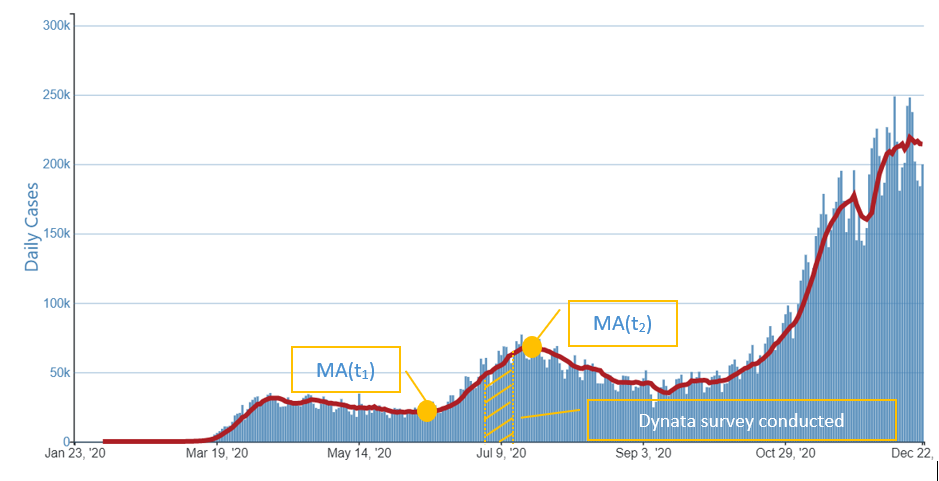

As discussed in the previous section, the data in this table reported cumulative daily cases in each U.S. county. In order to achieve the average number of weekly cases in each county, several steps were taken. First, due the massive amount of data conatined within it, all dates outside of the weeks corresponding to the trough and peak of the period under observation were filtered out of the table using a simple <i>where</i> clause. In order to calculate new case numbers from the existing cumulative data, the <i>lag</i> function was used to copy the case information contained in the previous record; this lag was performed in a partition by county, ordered by date, to ensure that the previous record contained the cumulative case data from the previous day within the same county. Daily new cases were then calculated by taking the difference between these values. The remainder of the query is comprised of the following steps:
1. Assign week numbers to each of the dates within the observation period using the <i>extract</i> function
2. Partition the data by county and by week in order to compute new case weekly averages
3. Join the data with the ACS data detailed in the previous section in order to gain county populations
4. Normalize new case number to new cases per 10,000 using county populations (these represent MA(t<sub>1</sub>) and MA(t<sub>2</sub>)
5. Use the <i>lag</i> function over a partition by county, ordered by ascending date, to achieve MA(t<sub>1</sub>) and MA(t<sub>2</sub>) for each record in the same row
6. Filter out the weeks corresponding to the trough of the period under observation
7. Take the difference between MA(t<sub>2</sub>) and MA(t<sub>1</sub>) to achieve the dependent variable

Since this query plays an integral role in the construction of each of the datasets required for this project, it has been included for the reader to view. The function below generates the query and displays each of its 9 stages.

In [ ]:
#Uncomment line below to view query
#show_new_cases()

An initial exploratory analysis of this variable revealed several key insights. A table of descriptive statistics, generated by a built-in function of the pandas Python extension, as well as an analysis of the percentiles of the variable, revealed that a small percentage of the data contains relatively extreme values. The histogram below shows these values to be densely clustered around zero and heavily positively skewed. Additionally, a chloropleth map of Y, shown below the histogram, has been included. Construction of this map intially involved joining the project dataset with another dataset of U.S. Census block shapes, aggregated up to county-level shapes using one of BigQuery's geospatial aggregation functions. This strategy was quickly replaced, however, after causing several instances to crash and significantly slowing performance. It is now created by through pandas' reading of an internet file located in a GitHub repository hosted by <a href="https://plotly.com/python/plotly-express/">Plotly</a>, the package with which nearly all visualizations in this report have been produced, using the urllib <i>urlopen()</i> and the pandas <i>csv.read()</i> functions.

In [ ]:
display(cases_hist.show())
display(cases_chlor.show())

<i><u>The Main Independent Variable</u></i><br>
The New Yorks Times' mask usage by county table contains 3,142 records, one for each county recognized by the U.S. Census Bureau. As will be discussed in the next section, four separate models were created for thise project as robustness checks; the sole differences between each model lie in the mask usage variables. In the primary model, all five mask usage categories are considerd. The three alternative models, however, aggregate these categories in different ways, as shown in the table below. Each of these aggregations was performed using a combination of SQL <i>case</i> statements and <i>sum</i> aggregation functions. The aggregations for each model are as follows:
- Primary Model: never / rarely / sometimes / frequently / always
- Alternative Model 1: never &rarr; never / (rarely, sometimes, frequently) &rarr; sometimes /  always &rarr; always
- Alternative Model 2: (never, rarely) &rarr; never /  (sometimes, frequently, always) &rarr; always
- Alternative Model 3: (never, rarely, sometimes) &rarr; never /  (frequently, always) &rarr; always




<ins><i>Population Controls</i></ins><br>
The data gathered from the American Community Survey (ACS) provides the ability to control for population demographics that might otherwise have contributed to the spread of COVID-19 in a given county. Fortunately, this data is gathered and analyzed at the county level, eliminating the need to aggregate up from lower levels of the U.S. Census Bureau's georgraphical heierarchy. In joining this table with the rest of the data, no rows were lost, except some belonging to the ACS pertaining to "administrative subdivisions" for which no mask usage data was gathered. As discussed previously, demographic statistics, originally expressed as raw numbers in the ACS dataset, were converted into population proportions of each, by simply dividing the values by the county's total population. Once this transformation was performed, the raw numbers were then excluded from the dataset.

<ins><i>Government Response Controls</i></ins><br>
The data in this table is reported for several nations in addition to the United States. As such, the policy stringencies of the other nations were filtered out using the <i>region_code</i>, part of the table's composite key. The leading two characters in this value pertain to the country, whereas the remaining two correspond with regions within it. The SQL <i>substring</i> function was used to distinguish between the two and match them with the code pertaining to the U.S., as well as those pertaining to each state. Each state's levels of stringency were then determined for both the beginning and end of the observation period, and the <i>lag</i> function again used to get each on the same row. Finally, The SQL aggregation function <i>max</i> was used to determine the maximum level of stringency implemented for each policy during the period.

<ins><i>Population Density Controls</i></ins><br>
When joining the population densities dataset, it was discovered that leading zeros had been dropped from each applicable FIPS code, causing the <i>join</i> statement to return considerably less rows than required. To fix this issue, the FIPS codes were cast as strings and the SQL <i>length</i> function used to find codes with fewer than the required five digits. A <i>case</i> statement was used to append a leading zero to all codes determined to have fewer than five digits. This resolved the issue and caused the join to return the expected 3,141 records.

In additon to fixing the issue with the FIPS codes, states and, subsequently, the counties contained within were categorized into one of four U.S. Census Bureau-defined regions: Midwest, Northeast, South, or West. This was done by first creating a new column of state codes through the use of the SQL <i>substring</i> function. Since the first two digits of county FIPS codes correspond with that county's state code, these values were stripped and placed in a new column titled "state." Four <i>case</i> statements were then used to create one column for each region and match each record's state code with a list of state codes provided in each statement.

Finally, the metropolitan counties table provided data that allowed for the binary classification of each county as either metropolitan or non-metropolitan. Though the U.S. Census Buruea recognizes a total of 6 classifications of this sype, the two used in this analysis are the broadest categories of which all 6 are subsets. As with the population densities table mentioned above, leading zeros of county FIPS codes had been truncated and, as such, had to be added back using the method outlined previously. Once that issues had been resolved, a new column titled "metropolitan" was created and each county assigned either a 0 or 1, depending on their classification, using a <i>case</i> statement.

Exploring the relationship between mask use and population density was a large part of the exploratory analysis. The scatterplots below for the Primary Model and Alternative Model 3 appear to indicate that high levels of mask adherence might, in fact, be correlated with population density, as proposed in the studies cited earlier. This finding is also supported by the analyses performed later on. The reader is encouraged to alter the visualization by clicking and double-clicking on the lenged for each, altering the plot. In each visualization, larger values of mask usage variables corresponding with higher levels of adherence appear to have larger cricles, indicating more densely populated counties, clustered around the black line at $x=0$. Conversely, as those same values decrease, larger circles can be found at increasing values along the x-axis, indicating higher levels of COVID spread during the observation period.

In [ ]:
display(fig0)
display(fig3)

<h4>Statistical methodology</h4>

<ins><i>The Model</i></ins><br>
As discussed, four models were constructed for this project, differing only in the way in which mask usage was categorized. In addition to the mask usage variables, the remainder of the model is comprised of control and interaction variables. In total, 26 control variables and one interaction term per mask usage variable were used. Each interaction term was defined as <i>metropolitan</i>*<i>[mask usage variable]</i>, where <i>metropolitan</i> is an indicator variable designating each county as either a metropolitan or non-metropolitan area. The motivation behind these terms is the notion that mask usage is more beneficial in densely populated areas, as proposed by <a href="https://www.sciencedirect.com/science/article/pii/S1319562X20306331?via%3Dihub1">Aabed and Lashin</a> (2021). When combined with the variables pertaining to mask usage, the following regression equations are achieved:
- Primary model:     $Y_i=\beta_0+\beta_1X_{1,i}+\beta_2X_{2,i}+\dots+\beta_{33}X_{33,i}+\varepsilon_i \;\,\;\;\;\;\;\;\;\;\; for \;  1 \leq i \leq 3141$
- Alternative model 1: $Y_i=\beta_0+\beta_1X_{1,i}+\beta_2X_{2,i}+\dots+\beta_{29}X_{29,i}+\varepsilon_i \;\;\;\; for \;  1 \leq i \leq 3141$
- Primary model 2: $Y_i=\beta_0+\beta_1X_{1,i}+\beta_2X_{2,i}+\dots+\beta_{27}X_{27,i}+\varepsilon_i \;\;\;\;\;\;\;\; for \;  1 \leq i \leq 3141$
- Primary model 3: $Y_i=\beta_0+\beta_1X_{1,i}+\beta_2X_{2,i}+\dots+\beta_{27}X_{27,i}+\varepsilon_i \;\;\;\,\;\;\;\; for \;  1 \leq i \leq 3141$

For the purposes of this paper, let $Y$ represent the $3141\times 1$ vector of of observed values $Y_i$, for $1 \leq i \leq 3141$. Furthermore, let $X$ represent the design matrix consisting of $1, X_{1,i}, X_{2,i}, \dots, X_{n,i},$ where $n \in (27,29,33)$ and $1 \leq i \leq 3141$. Let $\beta$ represent the $n\times 1$ vector of regression coefficients $\beta_1,\dots \beta_n$ where, again, $n \in (27,29,33)$. Finally, let $\varepsilon$ represent the $3141\times 1$ vector of disturbance terms, $\varepsilon_i$, for $1 \leq i \leq 3141$. Each model, then can simply be written as $Y=X\beta + \varepsilon$.

<ins><i>Analysis</i></ins><br>
Statistical analysis and calculations were performed using R version 4.1.2. After preparing the data for analysis, a  linear model was fit to the data and the residuals and predicted values saved for use in diagnostics. In order to visually assess the fit of the primary model, the observed values of Y were plotted against the predicted values of Y, the residuals were plotted against the predicted values of Y, and a normal QQ-plot of the residuals was created. From the analysis of these plots, it was concluded that curvature might be present in the model and that the error terms were both highly heteroskedastic and nonnormal. The plots generated for each of the alternative models yielded similar results.

In addition to the visual diagnostics performed above, formal testing was conducted using the Shapiro-Wilk and Brown-Forsythe tests. Both returned p-values less than the predetermined level of significance, 0.05, resulting in the rejection of both null hypotheses and the conclusion that the errors are both heteroskedastic and nonnormal.  This violates the Gauss-Markov assumptions that the error terms have constant variance and be normally distributed. As such, a transformation of the dependent variable was performed using the Box-Cox method.

<i>Box-Cox Transformation</ins><br>
Given that negative values were present in the vector $Y$, a translation was required before the power parameter, $\lambda$, could be determined. Given that Y has a minimum value of approximately -65.67 and a range of roughly 113, two different translations were considered (see Table 2). Let $\delta$ represent the value of the translation, so that $Y_t$=$Y+\delta$. 

Given a power parameter $\lambda\in R$, the Box-Cox transformation is given by the equation below.
$$ \widetilde{Y}=   \left\{
\begin{array}{ll}
      {Y_t}^\lambda & if \;\lambda \neq 0 \\
      ln(Y_t)  & if \;\lambda=0 \\
\end{array} 
\right.  $$

$ \widetilde{Y}$ was calculated for each model and translation, resulting in a total of eight transformed models of the form $\widetilde{Y} = X\beta+\varepsilon$. The Shapiro-Wilk and Brown-Forsythe tests were again run on each of these models in order to determine if the transformation eliminated the heteroskedasticity and nonnormality of the error terms. The results of the transformation are discussed in the next section.

<i>Stepwise Regression</i><br>
Due to the issues encountered during analysis, stepwise regression was performed as a final robustness check to determine if mask usage might have a statistically significant impact on the spread of COVID-19. The motivation behind this approach was that if a stepwise model was constructed using some, or all, of the mask usage variables, then this would serve as evidence of a potential effect of the latter on the former. Using R’s built-in stepwise regression function, this process was performed on each of the models under consideration, producing a total of four models with considerably reduced dimensionality. The results of this process are discussed in the next section.

<h4>Results</h4>
Despite the issues regarding the errors discussed in the previous section, it is worth noting that the initial linear regression model did not find any mask usage variables, or their respective interaction terms, to have a statistically significant effect on the dependent variable. Table 2 summarizes the results of the OLS regression for the mask usage variables in the primary model.

<center><div>
<img src="OLS-table.PNG" width="700"/>
</div></center>


The Box-Cox transformation, performed in an attempt to remedy the issues present in the errors, did not produce a useful result. Table 3 displays all eight transformations performed, as well as their respective Shapiro-Wilk and Brown-Forsythe test p-values. Though each transformation did increase the p-value returned from the Brown-Forsythe test in comparison to the untransformed model, it failed to do so to the point that the null hypothesis, homoskedasticity of the errors, could not be rejected. Similarly, not enough progress was made in regard to the p-value of the Shapiro-Wilk test that normality of the errors could not be rejected. Similar to the untransformed models, none of the mask usage variables in the transformed models were determined to be statistically significant.


<center><div>
<img src="BC.PNG" width="700"/>
</div></center>


Finally, the results of the stepwise regression analysis can be seen in Table 3. For each model, the number of explanatory variables was reduced by roughly half, resulting in a more accurate model, as evidenced by their respective Akaike Information Criteria. These models, however, should not be interpreted as valid in regard to the theory behind the spread of COVID-19. Rather, these results should be interpreted as indicators that regression results might conclude a statistically significant impact of mask usage variables on Y once the issues with the error terms have been resolved. Though not necessarily in-line with the theory of disease spread, this approach did produce the best results, as evidenced through f-test comparisons of all models, as well as RMSE cross-validation using an 80:20 training/validation split, respectively. Specifically, the stepwise regression of the Primary model yielded the lowest RMSE of 1.4546. In contrast, both Alternative Models 1 and 2 produced the worst results in regard to RMSE. Despite this, neither the stepwise Primary Model nor the stepwise Alternative Model 1 should be considered good predictors of COVID spread. The map below gives a visual summary of the R-squared values for each state produced by the best model constructed thus far, the stepwise Primary Model. It can be seen that the model results in poor fit for the majority of states, though in some states it fares well. Cumulatively, the model has an R-squared value of approximately 0.10.


<center><div>
<img src="step.PNG" width="700"/>
</div></center>



In [ ]:
display(best_model_chlor)

<h4>Discussion</h4>
The results of this analysis, thus far, are considered to be inconclusive. The issues encountered with the model’s error terms, primarily that of heteroskedasticity, result in inaccurate standard error estimates.Further testing, and possibly an alternative approach to this analysis, should be performed before a definitive conclusion can be made. Regardless, data exploration and the results gathered in this study suggest that the majority of focus should be devoted to the Primary Model and Alternative Model 3. It is believed that the poor performance witnessed in the other two models is likely due to poor aggregation of the mask usage categories. As was evidenced by several studies cited in this report, as well as exploratory analysis of the mask usage variables, mask effectiveness is driven by high compliance. Both the Primary Model and Alternative Model 3 prevent do well at preventing the mixing of high-adherence categories with lower-adherence categories.<br>

Additionally, because daily infection rates for each county are available, running a time-series regression should be considered. This study focused simply on the difference in new cases witnessed at the beginning and ending of the observational period. It is entirely possible, and even intuitive, that case numbers at time $t$ are dependent on case numbers at time $t-1$. As such, constructing a time series model with the average new cases reported each week during the five-week observation period might reduce some of the noise and decrease the presence of heteroskedasticity. It should be noted, however, that mask usage would be assumed to be constant during each week, as was assumed in this analysis.

Finally, the potential biases in this model should not be ignored. As discussed earlier, the self-reported nature of Dynata’s mask usage survey introduces the potential for both self-selection and response bias. Furthermore, because mask compliance is likely dependent on the perceived risk of serious infection or death, endogeneity bias might be present in the model as it currently stands. 

<h4>Conclusion</h4>
Given the issues that remain in the current models, it cannot be concluded whether mask usage has had a significant effect on the spread of COVID-19 in the United States. In the previous section, two approaches to resolving these issues were outline and should be implemented in future analyses. Resolution of the heteroskedasticity of the errors, and subsequent conclusions regarding the effectiveness of mask adherence on the spread of COVID-19, will provide valuable information as to whether governmental policies surrounding mask usage should be issued in the event of a future respiratory disease outbreak.
